In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "analysis.xlsx"

df = pd.read_excel(file, index_col = "Hours")
df

,electricity demand,wind generation
Hours,,
1,5151.0,3360.0
2,5046.0,3351.0
3,4933.5,3334.5
4,4785.0,3280.5
5,4722.0,3342.0
...,...,...
2846,7648.5,2797.5
2847,7695.0,2683.5
2848,7722.0,2494.5


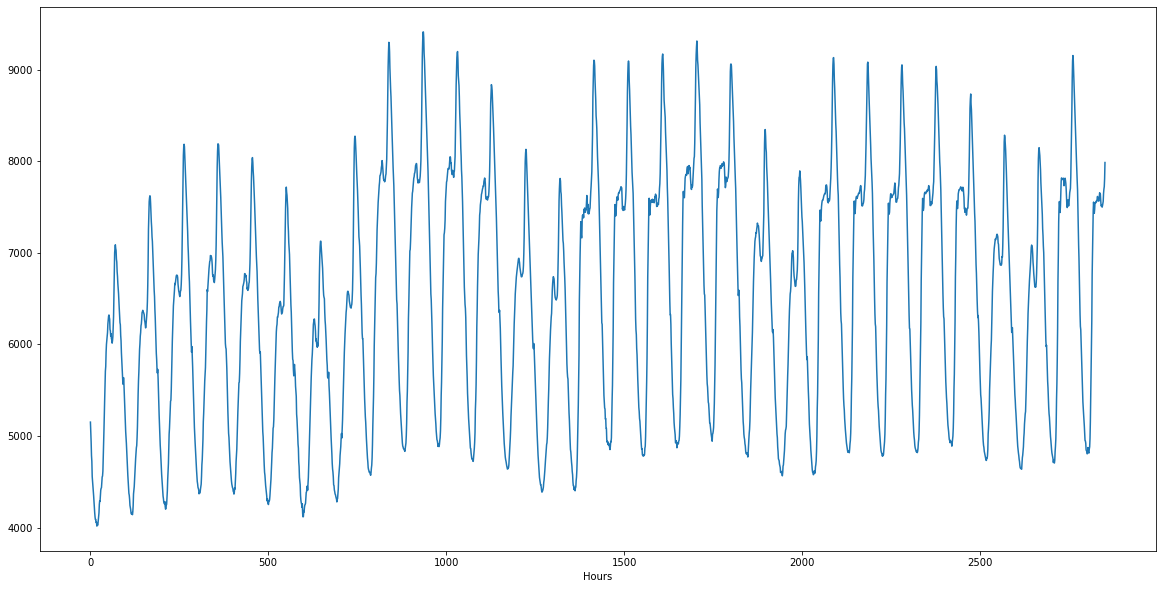

In [3]:
df["electricity demand"].plot(figsize=(20,10));

Text(0, 0.5, 'Electricity Demand (MW)')

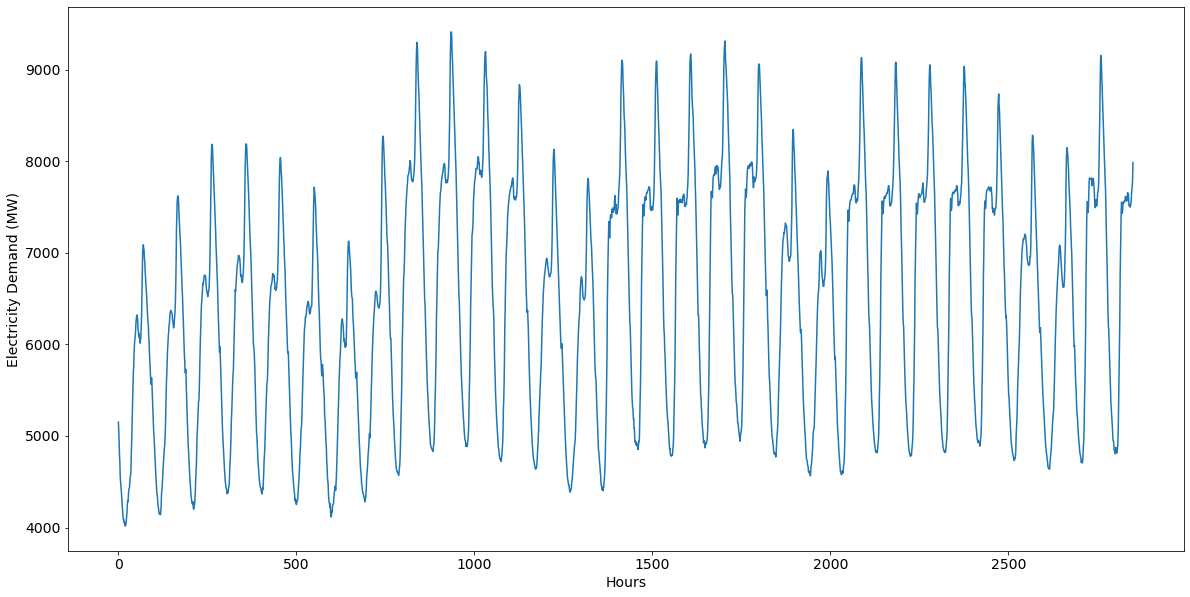

In [5]:
plt.figure(figsize = (20, 10))
plt.rcParams["font.size"] = 14

df["electricity demand"].plot()

plt.xlabel("Hours")
plt.ylabel("Electricity Demand (MW)")

###  Load Duration Curve

In [6]:
df[ ["electricity demand"] ]


,electricity demand
Hours,
1,5151.0
2,5046.0
3,4933.5
4,4785.0
5,4722.0
...,...
2846,7648.5
2847,7695.0
2848,7722.0


In [8]:
df_demand = df[ ["electricity demand"] ]

df_demand

,electricity demand
Hours,
1,5151.0
2,5046.0
3,4933.5
4,4785.0
5,4722.0
...,...
2846,7648.5
2847,7695.0
2848,7722.0


In [9]:
df_demand.sort_values(by = "electricity demand", ascending = False, inplace = True)
df_demand

<ipython-input-9-a0bd344969a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand.sort_values(by = "electricity demand", ascending = False, inplace = True)


,electricity demand
Hours,
936,9412.5
935,9411.0
937,9346.5
1704,9313.5
934,9309.0
...,...
17,4054.5
20,4039.5
22,4035.0


In [11]:
df_demand.index = np.arange(1, 2851)
df_demand

,electricity demand
1,9412.5
2,9411.0
3,9346.5
4,9313.5
5,9309.0
...,...
2846,4054.5
2847,4039.5
2848,4035.0
2849,4023.0


Text(0.5, 0, 'Hours')

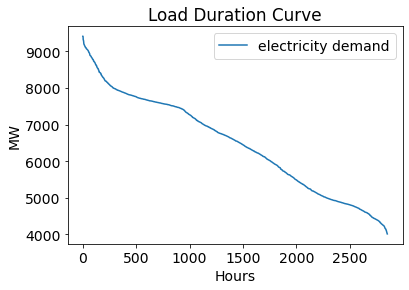

In [12]:
df_demand.plot()
plt.title("Load Duration Curve")
plt.ylabel("MW")
plt.xlabel("Hours")

In [13]:
df_demand.loc[df_demand.index[2850/2],df_demand.columns[0]]

6567.0

In [22]:
print("The minimum " + f"{df_demand.min()}")

The minimum electricity demand    4015.5
dtype: float64


In [15]:
df_demand.max()

electricity demand    9412.5
dtype: float64

### Residual Load Duration Curve

In [24]:
df["residual load"] = df["electricity demand"] - df["wind generation"]
df

,electricity demand,wind generation,residual load
Hours,,,
1,5151.0,3360.0,1791.0
2,5046.0,3351.0,1695.0
3,4933.5,3334.5,1599.0
4,4785.0,3280.5,1504.5
5,4722.0,3342.0,1380.0
...,...,...,...
2846,7648.5,2797.5,4851.0
2847,7695.0,2683.5,5011.5
2848,7722.0,2494.5,5227.5


In [26]:
df_residual = df[["residual load"]]
df_residual

,residual load
Hours,
1,1791.0
2,1695.0
3,1599.0
4,1504.5
5,1380.0
...,...
2846,4851.0
2847,5011.5
2848,5227.5


In [27]:
df_residual.sort_values(by='residual load',ascending=False,inplace=True)

<ipython-input-27-0ad674234f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_residual.sort_values(by='residual load',ascending=False,inplace=True)


In [28]:
df_residual

,residual load
Hours,
936,9337.5
935,9333.0
937,9271.5
934,9231.0
938,9097.5
...,...
15,1057.5
1353,1054.5
10,1047.0


In [30]:
df_residual.index = np.arange(1,len(df.index)+1)
df_residual

,residual load
1,9337.5
2,9333.0
3,9271.5
4,9231.0
5,9097.5
...,...
2846,1057.5
2847,1054.5
2848,1047.0
2849,1014.0


In [31]:
df_residual.loc[df_residual.index[2850/2],df_residual.columns[0]]

4825.5

Text(0.5, 0, 'Hours')

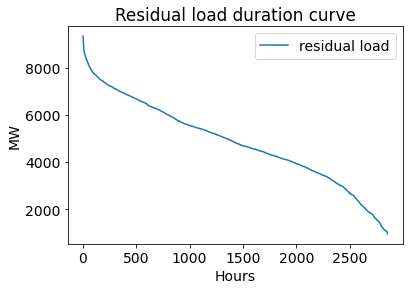

In [32]:
df_residual.plot()
plt.title("Residual load duration curve")
plt.ylabel("MW")
plt.xlabel("Hours")

In [33]:
# df_dem_res means dataframe for demand and residual load
df_dem_res = df_demand.join(df_residual)
df_dem_res

,electricity demand,residual load
1,9412.5,9337.5
2,9411.0,9333.0
3,9346.5,9271.5
4,9313.5,9231.0
5,9309.0,9097.5
...,...,...
2846,4054.5,1057.5
2847,4039.5,1054.5
2848,4035.0,1047.0
2849,4023.0,1014.0


In [35]:
df_dem_res["load_met_by_wind_generation"] = df_dem_res["electricity demand"] - df_dem_res["residual load"]
df_dem_res

,electricity demand,residual load,load_met_by_wind_generation
1,9412.5,9337.5,75.0
2,9411.0,9333.0,78.0
3,9346.5,9271.5,75.0
4,9313.5,9231.0,82.5
5,9309.0,9097.5,211.5
...,...,...,...
2846,4054.5,1057.5,2997.0
2847,4039.5,1054.5,2985.0
2848,4035.0,1047.0,2988.0
2849,4023.0,1014.0,3009.0


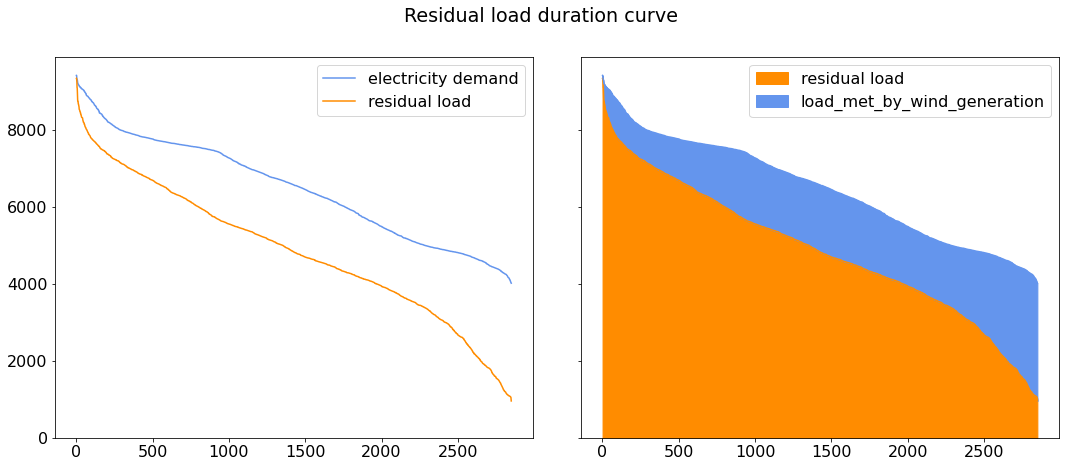

In [40]:
plt.rcParams["font.size"]=16
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,7), sharey=True)

plt.subplots_adjust(wspace=0.1)

fig.suptitle("Residual load duration curve")

df_dem_res[["electricity demand","residual load" ]].plot(ax=ax1, color = ["cornflowerblue", "darkorange"])

df_dem_res[["residual load","load_met_by_wind_generation"]].plot(ax=ax2, color = [ "darkorange","cornflowerblue"],
                                                                kind = "area", stacked = True)
plt.show()

In [41]:
df_wind_generation = df[["wind generation"]]
df_wind_generation

,wind generation
Hours,
1,3360.0
2,3351.0
3,3334.5
4,3280.5
5,3342.0
...,...
2846,2797.5
2847,2683.5
2848,2494.5


In [42]:
df_wind_generation.sort_values(by="wind generation", ascending=False, inplace=True)
df_wind_generation.index = np.arange(1,2851)
df_wind_generation

<ipython-input-42-8db7a657761d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind_generation.sort_values(by="wind generation", ascending=False, inplace=True)


,wind generation
1,4222.5
2,4206.0
3,4198.5
4,4197.0
5,4158.0
...,...
2846,46.5
2847,46.5
2848,45.0
2849,43.5


In [44]:
df_demand2 = df_residual.join(df_wind_generation)
df_demand2

,residual load,wind generation
1,9337.5,4222.5
2,9333.0,4206.0
3,9271.5,4198.5
4,9231.0,4197.0
5,9097.5,4158.0
...,...,...
2846,1057.5,46.5
2847,1054.5,46.5
2848,1047.0,45.0
2849,1014.0,43.5


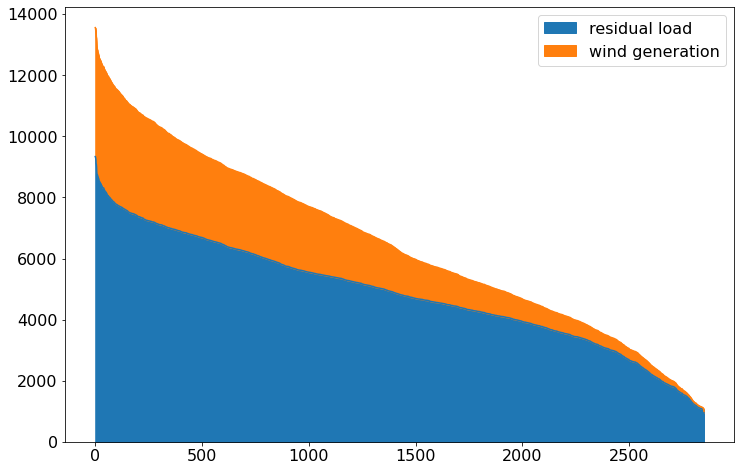

In [47]:

df_demand2.plot(figsize=(12,8), kind="area", stacked = True)

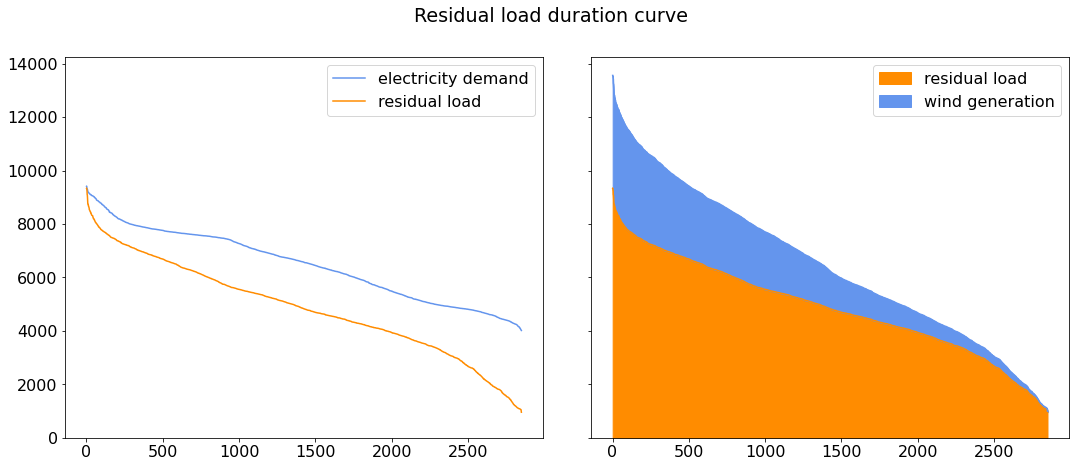

In [48]:
plt.rcParams["font.size"]=16
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,7), sharey=True)

plt.subplots_adjust(wspace=0.1)

fig.suptitle("Residual load duration curve")

df_dem_res[["electricity demand","residual load" ]].plot(ax=ax1, color = ["cornflowerblue", "darkorange"])

df_demand2[["residual load","wind generation"]].plot(ax=ax2, color = [ "darkorange","cornflowerblue"],
                                                                kind = "area", stacked = True)
plt.show()

In [49]:
df

,electricity demand,wind generation,residual load
Hours,,,
1,5151.0,3360.0,1791.0
2,5046.0,3351.0,1695.0
3,4933.5,3334.5,1599.0
4,4785.0,3280.5,1504.5
5,4722.0,3342.0,1380.0
...,...,...,...
2846,7648.5,2797.5,4851.0
2847,7695.0,2683.5,5011.5
2848,7722.0,2494.5,5227.5


In [51]:
df_demand3 = df[["residual load","wind generation"]]
df_demand3

,residual load,wind generation
Hours,,
1,1791.0,3360.0
2,1695.0,3351.0
3,1599.0,3334.5
4,1504.5,3280.5
5,1380.0,3342.0
...,...,...
2846,4851.0,2797.5
2847,5011.5,2683.5
2848,5227.5,2494.5


In [52]:
df_demand3.sort_values(by="residual load", ascending=False, inplace=True)
df_demand3.index = np.arange(1,2851)
df_demand3

<ipython-input-52-adc11ec5f90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demand3.sort_values(by="residual load", ascending=False, inplace=True)


,residual load,wind generation
1,9337.5,75.0
2,9333.0,78.0
3,9271.5,75.0
4,9231.0,78.0
5,9097.5,82.5
...,...,...
2846,1057.5,3028.5
2847,1054.5,3619.5
2848,1047.0,3300.0
2849,1014.0,3210.0


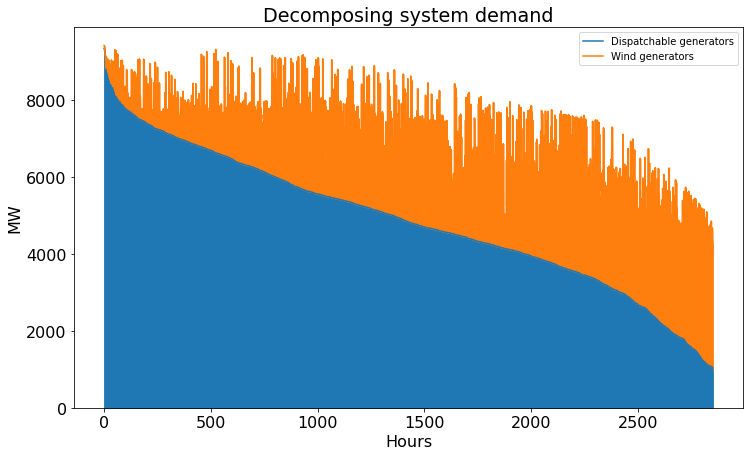

In [58]:
#fig, ax = plt.subplot()

df_demand3.plot(figsize = (12,7), kind= "area", stacked= True)
plt.ylabel("MW")
plt.xlabel("Hours")
plt.title("Decomposing system demand")
plt.legend(labels = ["Dispatchable generators", "Wind generators"], loc = "upper right", fontsize = 10)
plt.show()

In [59]:
df_dem_res

,electricity demand,residual load,load_met_by_wind_generation
1,9412.5,9337.5,75.0
2,9411.0,9333.0,78.0
3,9346.5,9271.5,75.0
4,9313.5,9231.0,82.5
5,9309.0,9097.5,211.5
...,...,...,...
2846,4054.5,1057.5,2997.0
2847,4039.5,1054.5,2985.0
2848,4035.0,1047.0,2988.0
2849,4023.0,1014.0,3009.0


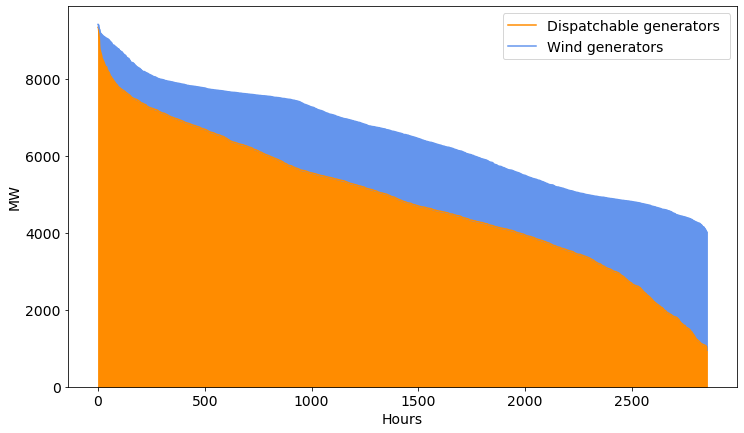

In [63]:
plt.rcParams["font.size"]=14
#fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,7), sharey=True)

#plt.subplots_adjust(wspace=0.1)

#fig.suptitle("Residual load duration curve")

#df_dem_res[["electricity demand","residual load" ]].plot(ax=ax1, color = ["cornflowerblue", "darkorange"])

df_dem_res[["residual load","load_met_by_wind_generation"]].plot(figsize = (12,7), color = [ "darkorange","cornflowerblue"],
                                                                kind = "area", stacked = True)
plt.ylabel("MW")
plt.xlabel("Hours")

plt.legend(labels = ["Dispatchable generators ","Wind generators"], loc = "upper right", fontsize=14)
plt.show()

In [66]:
# Baseload is the load (minimum load)that needs to be supplied with electrcity throughout the time period under consideration
df_dem_res["base_load"]= df_dem_res["electricity demand"].min()
df_dem_res

,electricity demand,residual load,load_met_by_wind_generation,base_load
1,9412.5,9337.5,75.0,4015.5
2,9411.0,9333.0,78.0,4015.5
3,9346.5,9271.5,75.0,4015.5
4,9313.5,9231.0,82.5,4015.5
5,9309.0,9097.5,211.5,4015.5
...,...,...,...,...
2846,4054.5,1057.5,2997.0,4015.5
2847,4039.5,1054.5,2985.0,4015.5
2848,4035.0,1047.0,2988.0,4015.5
2849,4023.0,1014.0,3009.0,4015.5


In [67]:
df_dem_res["intermediate + peak load"] = df_dem_res["electricity demand"] - df_dem_res["base_load"]
df_dem_res

,electricity demand,residual load,load_met_by_wind_generation,base_load,intermediate + peak load
1,9412.5,9337.5,75.0,4015.5,5397.0
2,9411.0,9333.0,78.0,4015.5,5395.5
3,9346.5,9271.5,75.0,4015.5,5331.0
4,9313.5,9231.0,82.5,4015.5,5298.0
5,9309.0,9097.5,211.5,4015.5,5293.5
...,...,...,...,...,...
2846,4054.5,1057.5,2997.0,4015.5,39.0
2847,4039.5,1054.5,2985.0,4015.5,24.0
2848,4035.0,1047.0,2988.0,4015.5,19.5
2849,4023.0,1014.0,3009.0,4015.5,7.5


In [103]:
minimum_value = df["electricity demand"].min()
minimum_index = df["electricity demand"].idxmin()
print("Minimum hour is " + str(minimum_index)) 
print("Minimum demand is " + str(minimum_value))

Minimum hour is 19
Minimum demand is 4015.5


In [104]:
maximum_value = df["electricity demand"].max()
maximum_index = df["electricity demand"].idxmax()
print("Minimum hour is " + str(maximum_index)) 
print("Minimum demand is " + str(maximum_value))

Minimum hour is 936
Minimum demand is 9412.5


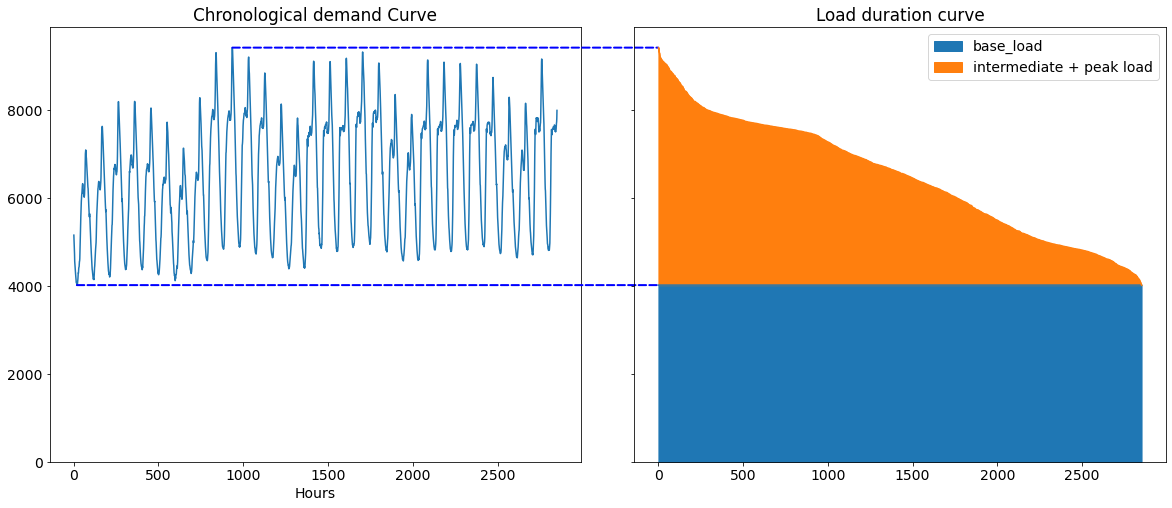

In [84]:
#plt.rcParams["font.size"]=16
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,8), sharey=True)

plt.subplots_adjust(wspace=0.1)

df["electricity demand"].plot(ax = ax1)
ax1.set_title("Chronological demand Curve")

df_dem_res[["base_load","intermediate + peak load"]].plot(ax=ax2, kind = "area", stacked = True)
ax2.set_title("Load duration curve")

#fig.suptitle("Residual load duration curve")

from matplotlib.patches import ConnectionPatch

con = ConnectionPatch(xyA = (19, 4015.5),
                      xyB = (0, 4015.5),
                      coordsA="data",
                      coordsB="data",
                      axesA=ax1,
                      axesB=ax2,
                      color="blue",
                      linestyle = "dashed",
                      linewidth = 2)
ax2.add_artist(con)


con2 = ConnectionPatch(xyA = (936, 9412.5),
                      xyB = (0, 9412.5),
                      coordsA="data",
                      coordsB="data",
                      axesA=ax1,
                      axesB=ax2,
                      color="blue",
                      linestyle = "dashed",
                      linewidth = 2)
                      
ax2.add_artist(con2)



#plt.show()

In [105]:
df_dem_res["electricity demand"].min()

4015.5

In [106]:
df_dem_res["electricity demand"].max()

9412.5